# Pandas

In [1]:
import pandas as pd
import numpy as np

## 载入数据

In [2]:
l = [1,2,3]
pd.Series(l)

0    1
1    2
2    3
dtype: int64

In [3]:
with open('./ds/Data.csv', 'r', encoding='utf-8') as f:
    print(f.read())

Country,Age,Salary,Purchased
France,44,72000,No
Spain,27,48000,Yes
Germany,30,54000,No
Spain,38,61000,No
Germany,40,,Yes
France,35,58000,Yes
Spain,,52000,No
France,48,79000,Yes
Germany,50,83000,No
France,37,67000,Yes


In [4]:
# index_col 使用 第 0 列 作为 row index
# df = pd.read_csv('./ds/Data.csv', index_col=0 )
df = pd.read_csv('./ds/Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [5]:
# 保存数据
row_index = 2
new_df = df.loc[row_index,:]
new_df.to_csv('./ds/output.csv')
new_df = pd.read_csv('./ds/output.csv', index_col=0)
new_df

,2
Country,Germany
Age,30.0
Salary,54000.0
Purchased,No


In [6]:
# 从网络读取
pd.read_html("https://mofanpy.com/tutorials/data-manipulation/pandas/read-save/")

[   学号  姓名   身高  体重   肺活量
 0   1  小明  168  60  3200
 1   2  小黄  187  80  3800
 2   3  小花  170  70  3400]

## 数据序列Series

In [7]:
pd.Series(l)

# 自定义索引
pd.Series(l, index=["a", "b", "c"])

s = pd.Series(l, index=["b", "c", "d"])
s

b    1
c    2
d    3
dtype: int64

In [8]:
s.to_numpy()

array([1, 2, 3])

In [9]:
s.values.tolist()

[1, 2, 3]

## 数据表DataFrame

In [10]:
df = pd.DataFrame({"col1": [1,3], "col2": [2, 4]})
df['col1']

0    1
1    3
Name: col1, dtype: int64

In [11]:
df.index
df.columns
df.values

array([[1, 2],
       [3, 4]])

In [12]:
#
json_data = [
  {"age": 12, "height": 111},
  {"age": 13, "height": 123}
]
pd.DataFrame(json_data, index=["jack", "rose"])

,age,height
jack,12,111
rose,13,123


## 数据选择

In [13]:
data = np.arange(-12, 12).reshape((6, 4))
df = pd.DataFrame(
  data, 
  index=list("abcdef"), 
  columns=list("ABCD"))
df

,A,B,C,D
a,-12,-11,-10,-9
b,-8,-7,-6,-5
c,-4,-3,-2,-1
d,0,1,2,3
e,4,5,6,7
f,8,9,10,11


In [14]:
# Numpy 选取数据是按维度的先后（先选第一维，再第二，以此类推）
data[:,[0,1]]

array([[-12, -11],
       [ -8,  -7],
       [ -4,  -3],
       [  0,   1],
       [  4,   5],
       [  8,   9]])

In [15]:
df[['A','B']]

,A,B
a,-12,-11
b,-8,-7
c,-4,-3
d,0,1
e,4,5
f,8,9


In [16]:
# 选择从 0 到 (3-1) 行的，1 到 (3-1) 列，
data[0:3, 1:3]

array([[-11, -10],
       [ -7,  -6],
       [ -3,  -2]])

In [17]:
df.loc["a":"c", "B":"C"]

,B,C
a,-11,-10
b,-7,-6
c,-3,-2


In [18]:
# 选择第3行，第1行
data[[3,1], :]

array([[ 0,  1,  2,  3],
       [-8, -7, -6, -5]])

In [19]:
df.loc[['d', 'b'],:]

,A,B,C,D
d,0,1,2,3
b,-8,-7,-6,-5


In [20]:
# iloc 的选取方式简直和 Numpy 的模式一模一样
df.iloc[[3,1],:]

,A,B,C,D
d,0,1,2,3
b,-8,-7,-6,-5


In [21]:
# 混搭模式 loc 和 icol
row_labels = df.index[2:4]
print("row_labels:\n", row_labels)
print("\ndf:\n", df.loc[row_labels, ["A", "C"]])

row_labels:
 Index(['c', 'd'], dtype='object')

df:
    A  C
c -4 -2
d  0  2


In [22]:
col_labels = df.columns[[0, 2]]
print("col_labels:\n", col_labels)
print("\ndf:\n", df.loc[row_labels, col_labels])

col_labels:
 Index(['A', 'C'], dtype='object')

df:
    A  C
c -4 -2
d  0  2


In [23]:
# 获取 indexer a 和 b 的 序号
df.index.get_indexer(["a", "b"]) 

array([0, 1])

## 条件过滤筛选

In [24]:
df['A'] < 0


a     True
b     True
c     True
d    False
e    False
f    False
Name: A, dtype: bool

In [25]:
# A 列 < 0
df[df['A'] < 0]
df[df['A'] < 0]['A']

a   -12
b    -8
c    -4
Name: A, dtype: int64

In [26]:
s = df.iloc[0] < -10
s

A     True
B     True
C    False
D    False
Name: a, dtype: bool

In [27]:
# ~ 表示 非
df.loc[:, ~s]

,C,D
a,-10,-9
b,-6,-5
c,-2,-1
d,2,3
e,6,7
f,10,11


In [28]:
# 还能用或 | 来表示 or 的意思, & 表述 and
i0 = df.iloc[0]
s = ~(i0 < -10) | (i0 < -11)
s

A     True
B    False
C     True
D     True
Name: a, dtype: bool

In [29]:
df.loc[:, s]

,A,C,D
a,-12,-10,-9
b,-8,-6,-5
c,-4,-2,-1
d,0,2,3
e,4,6,7
f,8,10,11


In [30]:
# 可以用 .loc 或者 .iloc 来做过滤处理，然后再用 .loc 来做筛选
df.loc[:, ~(df.iloc[0] < -10)]

,C,D
a,-10,-9
b,-6,-5
c,-2,-1
d,2,3
e,6,7
f,10,11


In [31]:
df.iloc[0] < -10

A     True
B     True
C    False
D    False
Name: a, dtype: bool

In [32]:
# 构建 dataframe
data = np.array([
    [1.39, 1.77, None],
    [0.34, 1.91, -0.05],
    [0.34, 1.47, 1.22],
    [None, 0.27, -0.61]
])
df = pd.DataFrame(data, index=["r0", "r1", "r2", "r3"], columns=["c0", "c1", "c2"])
df

,c0,c1,c2
r0,1.39,1.77,None
r1,0.34,1.91,-0.05
r2,0.34,1.47,1.22
r3,None,0.27,-0.61


In [33]:
# df.mean()
df.mean(axis=0)

c0    0.690000
c1    1.355000
c2    0.186667
dtype: float64

In [34]:
# 等价操作
# 默认会自动忽略 空值 cell
print(df.mean())
print(df.mean(axis=0))
print(df.mean(axis=0, skipna=True))

# 试图忽略空值列
# df.mean(axis=0, skipna=False) # deprecated
df.dropna(axis=1).mean(axis=0)

c0    0.690000
c1    1.355000
c2    0.186667
dtype: float64
c0    0.690000
c1    1.355000
c2    0.186667
dtype: float64
c0    0.690000
c1    1.355000
c2    0.186667
dtype: float64


c1    1.355
dtype: float64

### 删除空值

In [35]:
df

,c0,c1,c2
r0,1.39,1.77,None
r1,0.34,1.91,-0.05
r2,0.34,1.47,1.22
r3,None,0.27,-0.61


In [36]:
df.dropna().values#.max()

array([[0.34, 1.91, -0.05],
       [0.34, 1.47, 1.22]], dtype=object)

In [37]:
# 默认按行删除
df.dropna()
# ==
# df.dropna(axis=0)

,c0,c1,c2
r1,0.34,1.91,-0.05
r2,0.34,1.47,1.22


In [38]:
df.dropna(axis=1)

,c1
r0,1.77
r1,1.91
r2,1.47
r3,0.27


In [39]:
# 数据只要有值就留下来，只去除掉那些全为空的数据
# df.dropna(how='all')

# 默认 how = 'any'
df.dropna(how='any')

,c0,c1,c2
r1,0.34,1.91,-0.05
r2,0.34,1.47,1.22


### 填充

- 对空值进行填充

In [40]:
df.fillna(111)

,c0,c1,c2
r0,1.39,1.77,111.00
r1,0.34,1.91,-0.05
r2,0.34,1.47,1.22
r3,111.00,0.27,-0.61


- 对不同特征列做差异化的填充数值

In [41]:
values = {"c0": 0, "c1": 2, "c2": 3}
df.fillna(value=values)

,c0,c1,c2
r0,1.39,1.77,3.00
r1,0.34,1.91,-0.05
r2,0.34,1.47,1.22
r3,0.00,0.27,-0.61


- 用一个全新的 df 来做空位的填充

In [42]:
df2 = pd.DataFrame(np.arange(12).reshape((4,3)), index=["r0", "r1", "r2", "r3"], columns=["c0", "c1", "c2"])
print(df2)
df.fillna(df2)

    c0  c1  c2
r0   0   1   2
r1   3   4   5
r2   6   7   8
r3   9  10  11


,c0,c1,c2
r0,1.39,1.77,2
r1,0.34,1.91,-0.05
r2,0.34,1.47,1.22
r3,9,0.27,-0.61


### 获取索引

- idxmax
- idxmin

In [43]:
df = pd.DataFrame([[1, 2, 3, 0],
                   [3, 4, None, 1],
                   [3, 5, 2, 1],
                   [3, 2, 2, 3]],
                  columns=list("ABCD"))
print(df)
print("\nidxmax():\n", df.idxmax())
# skipna 对空值做控制
print("\nidxmax(skipna=False):\n", df.idxmax(skipna=False))
print("\nidxmin():\n", df.idxmin())

   A  B    C  D
0  1  2  3.0  0
1  3  4  NaN  1
2  3  5  2.0  1
3  3  2  2.0  3

idxmax():
 A    1
B    2
C    0
D    3
dtype: int64

idxmax(skipna=False):
 A    1.0
B    2.0
C    NaN
D    3.0
dtype: float64

idxmin():
 A    0
B    0
C    2
D    0
dtype: int64


## 数据可视化技术

参考 [官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

### 散点图Scatter


<Axes: xlabel='x', ylabel='y'>

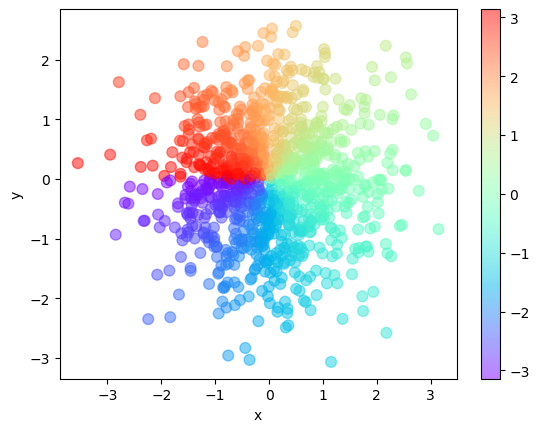

In [44]:
n = 1024    # data size
df = pd.DataFrame({
    "x": np.random.normal(0, 1, n),
    "y": np.random.normal(0, 1, n), 
})
color = np.arctan2(df["y"], df["x"])
# c: 对于这组数据中每个（x,y）数据点的颜色值
# s: 画点的大小（size）
# cmap：colormap，https://matplotlib.org/stable/tutorials/colors/colormaps.html
df.plot.scatter(x="x", y="y", c=color, s=60, alpha=.5, cmap="rainbow")

### 折线图Plot

- 单线

<Axes: xlabel='x'>

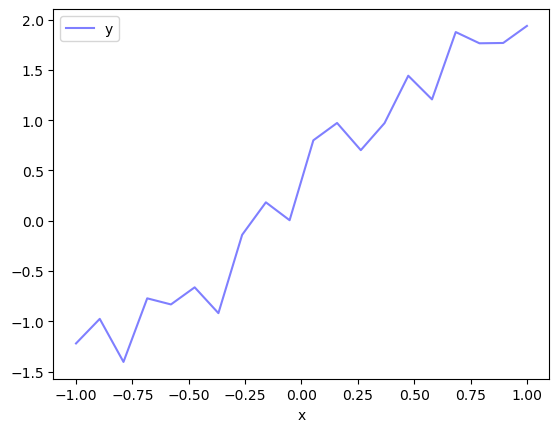

In [45]:
n = 20    # data size
x = np.linspace(-1, 1, n)
y = x * 2 + 0.4 + np.random.normal(0, 0.3, n)
df = pd.DataFrame({
    "x": x,
    "y": y, 
})
df.plot(x="x", y="y", alpha=.5, c="b")

- 多条线


<Axes: xlabel='x'>

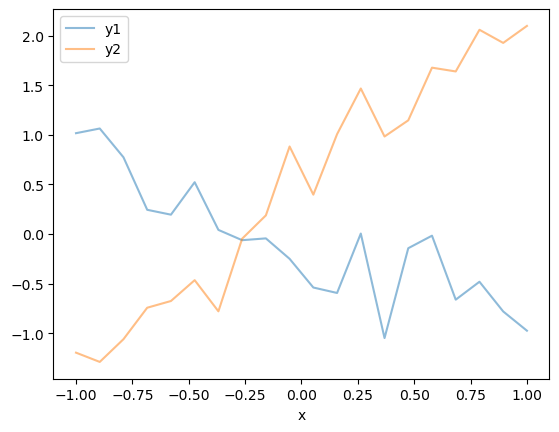

In [46]:
n = 20    # data size
x = np.linspace(-1, 1, n)
y1 = x * -1 - 0.1 + np.random.normal(0, 0.3, n)
y2 = x * 2 + 0.4 + np.random.normal(0, 0.3, n)
df = pd.DataFrame({
    "x": x,
    "y1": y1,
    "y2": y2, 
})
df.plot(x="x", y=["y1", "y2"], alpha=.5)

### 条形图 Bar


<Axes: >

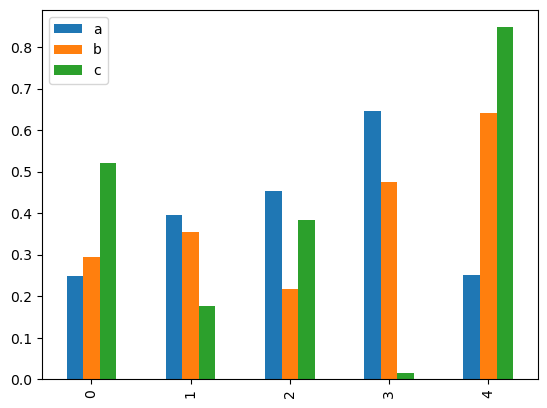

In [47]:
# abc 三家公司，这 5 年的营收对比
df = pd.DataFrame(np.random.rand(5, 3), columns=["a", "b", "c"])
df.plot.bar()

<Axes: >

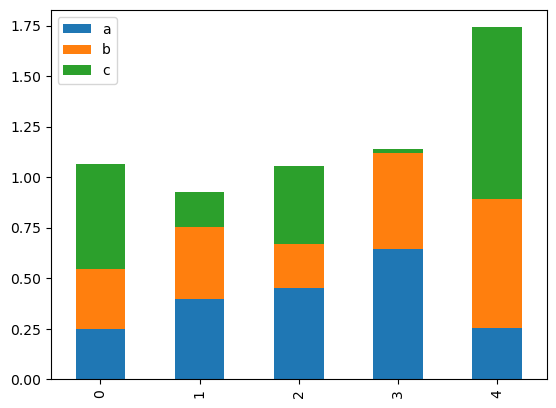

In [48]:
# 放在一起来看占比多少
df.plot.bar(stacked=True)

<Axes: >

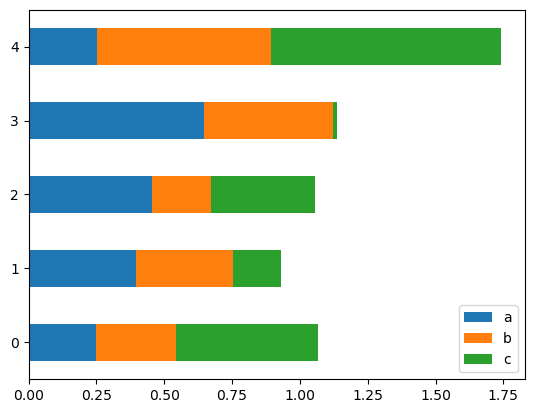

In [49]:
# 换成 竖图

df.plot.barh(stacked=True)

### 分布图 Histograms

<Axes: ylabel='Frequency'>

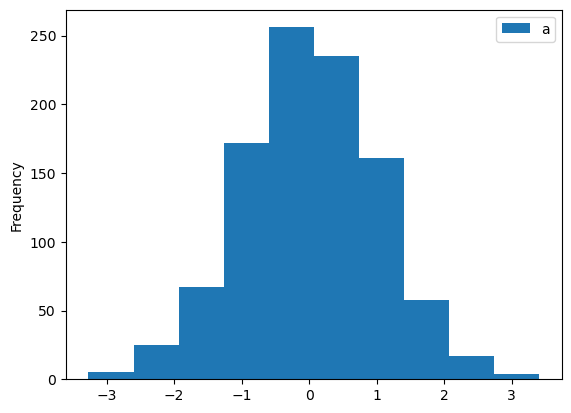

In [50]:
df = pd.DataFrame({"a": np.random.randn(1000)})

df.plot.hist()

<Axes: ylabel='Frequency'>

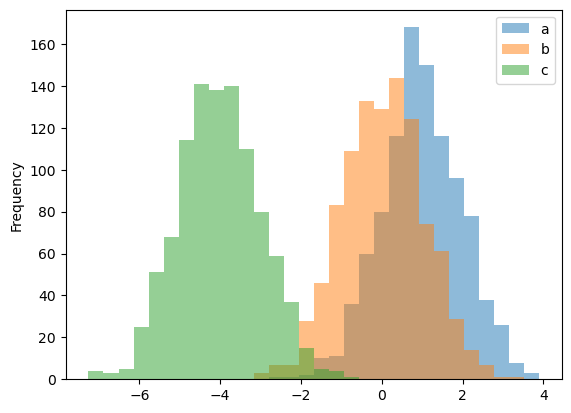

In [51]:
df = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 4,
    }
)

# bins 柱状体的数量
df.plot.hist(alpha=0.5, bins=30)

### 饼图 Pie


<Axes: ylabel='boss'>

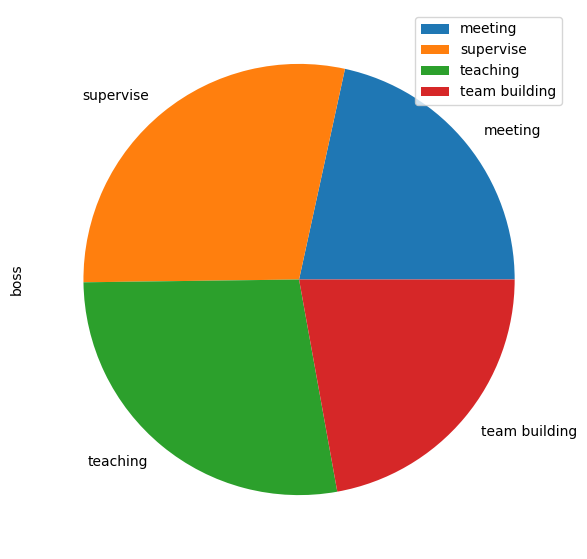

In [52]:
df = pd.DataFrame(
    {"boss": np.random.rand(4)},
    index=["meeting", "supervise", "teaching", "team building"], 
)
df

df.plot.pie(y="boss", figsize=(7,7))

- 多张大饼对比图

使用 subplots

array([<Axes: ylabel='bigBoss'>, <Axes: ylabel='smallBoss'>], dtype=object)

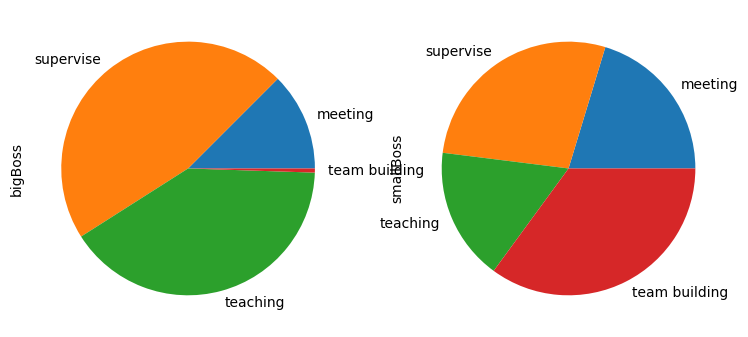

In [53]:
df = pd.DataFrame(
    {
        "bigBoss": np.random.rand(4),
        "smallBoss": np.random.rand(4),
    },
    index=["meeting", "supervise", "teaching", "team building"], 
)
df
df.plot.pie(subplots=True, figsize=(9,9), legend=False)

### 面积图 Area

比如，可以观察出占比（面积）随时间（x轴）的变化。

<Axes: >

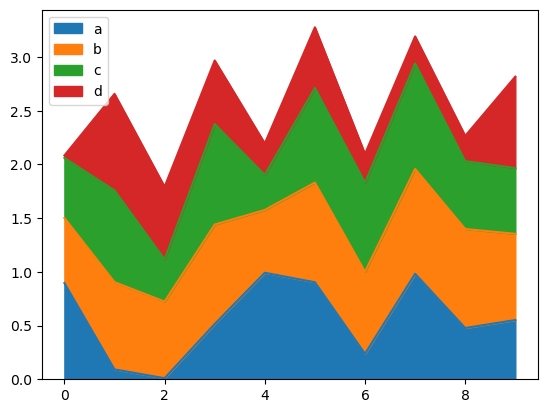

In [54]:
df = pd.DataFrame(
    np.random.rand(10, 4), 
    columns=["a", "b", "c", "d"]
)
df
df.plot.area()

<Axes: >

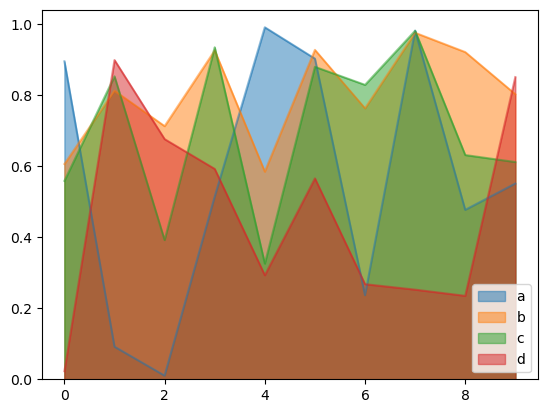

In [55]:
df.plot.area(stacked=False)

### 运算

In [56]:
data = np.arange(-12, 12).reshape((6, 4))
df = pd.DataFrame(
  data, 
  index=list("abcdef"), 
  columns=list("ABCD"))
df

,A,B,C,D
a,-12,-11,-10,-9
b,-8,-7,-6,-5
c,-4,-3,-2,-1
d,0,1,2,3
e,4,5,6,7
f,8,9,10,11


In [57]:
df['A'] *= 0
df

,A,B,C,D
a,0,-11,-10,-9
b,0,-7,-6,-5
c,0,-3,-2,-1
d,0,1,2,3
e,0,5,6,7
f,0,9,10,11


In [58]:
df.loc['a','A'] = 100
df.loc['a',:] *= 2
df 

,A,B,C,D
a,200,-22,-20,-18
b,0,-7,-6,-5
c,0,-3,-2,-1
d,0,1,2,3
e,0,5,6,7
f,0,9,10,11


In [59]:
df['A'][df['A'] == 0] = -1
df

,A,B,C,D
a,200,-22,-20,-18
b,-1,-7,-6,-5
c,-1,-3,-2,-1
d,-1,1,2,3
e,-1,5,6,7
f,-1,9,10,11


In [60]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9


In [61]:
# np.sqrt(df)
# == 
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [62]:
def func(x):
    return x[0] * 2, x[1] * -1

# axis = 0 or df's index apply func to each column
# axis = 1 or df's columns apply func to each row
# df.apply(func, axis=1, result_type='expand')
# result_type='broadcast': 原 column 和 index 名会继承到新生成的数据中
df.apply(func, axis=1, result_type='broadcast')

,A,B
0,8,-9
1,8,-9
2,8,-9


In [63]:
def func(x):
    return x["A"] * 4

# df.apply(func, axis=1)

df['A'] * 4

0    16
1    16
2    16
Name: A, dtype: int64

In [64]:
def func(r):
    return r[2] * 4

print("origin:\n", df)

last_row = df.apply(func, axis=0)
print("\nlast_row:\n", last_row)

# result_type works for columns
df.iloc[2, :] = last_row
print("\ndf:\n", df)

origin:
    A  B
0  4  9
1  4  9
2  4  9

last_row:
 A    16
B    36
dtype: int64

df:
     A   B
0   4   9
1   4   9
2  16  36


## 文字处理

- 格式转换

In [65]:
py_s = "A,B,C,Aaba,Baca,CABA,dog,cat"

# pd_s = pd.Series(py_s.split(','), dtype="string")
pd_s = pd.Series(py_s.split(','))

In [66]:
print("pd_s type:", pd_s.dtype)

new_pd_s = pd_s.astype("string")
print("new_pd_s type:", new_pd_s.dtype)

pd_s type: object
new_pd_s type: string


In [67]:
print("python lower:\n", py_s.lower())
print("\npandas lower:\n", pd_s.str.lower())
print("\npython len:\n", [len(s) for s in py_s.split(",")])
print("\npandas len:\n", pd_s.str.len())

python lower:
 a,b,c,aaba,baca,caba,dog,cat

pandas lower:
 0       a
1       b
2       c
3    aaba
4    baca
5    caba
6     dog
7     cat
dtype: object

python len:
 [1, 1, 1, 4, 4, 4, 3, 3]

pandas len:
 0    1
1    1
2    1
3    4
4    4
5    4
6    3
7    3
dtype: int64


In [68]:
py_s = ["a_b_c", "jill_jesse", "frank"]
pd_s = pd.Series(py_s, dtype="string")
print("python split:\n", [s.split("_") for s in py_s])
print("\npandas split:\n", pd_s.str.split("_"))

python split:
 [['a', 'b', 'c'], ['jill', 'jesse'], ['frank']]

pandas split:
 0        [a, b, c]
1    [jill, jesse]
2          [frank]
dtype: object


In [69]:
# 不够的 cell 会补齐 pd.NA
pd_s.str.split("_", expand=True)

,0,1,2
0,a,b,c
1,jill,jesse,<NA>
2,frank,<NA>,<NA>


In [70]:
pd_df = pd.DataFrame([["a", "b"], ["C", "D"]])
print("origin:\n", pd_df)
pd_df.iloc[0,:] = pd_df.iloc[0, :].str.upper()
pd_df

origin:
    0  1
0  a  b
1  C  D


,0,1
0,A,B
1,C,D


- 正则方案

In [71]:
pattern = r"[0-9][a-z]"
s = pd.Series(["1", "1a", "11c", "abc"], dtype="string")
print("s:\n", s)
s.str.contains(pattern)

s:
 0      1
1     1a
2    11c
3    abc
dtype: string


0    False
1     True
2     True
3    False
dtype: boolean

In [72]:
# match() 要完全匹配才会返回 True 
s.str.match(pattern)

0    False
1     True
2    False
3    False
dtype: boolean

In [73]:
py_s = ["1", "1a", "21c", "abc"]
pd_s = pd.Series(py_s, dtype="string")
print("origin:\n", pd_s)

print("\npy_s replace '1' -> '9':\n", [s.replace("1", "9") for s in py_s])
print("\n\npd_s replace '1' -> '9':\n", pd_s.str.replace("1", "9"))

origin:
 0      1
1     1a
2    21c
3    abc
dtype: string

py_s replace '1' -> '9':
 ['9', '9a', '29c', 'abc']


pd_s replace '1' -> '9':
 0      9
1     9a
2    29c
3    abc
dtype: string


In [74]:
# replace all numbers to NUM
print("pd_s replace -> 'NUM':")
pd_s.str.replace(r"[0-9]", "NUM", regex=True)

pd_s replace -> 'NUM':


0        NUM
1       NUMa
2    NUMNUMc
3        abc
dtype: string

In [75]:
s = pd.Series(['a1', 'b2', 'c3'])
print("s:\n", s)
s.str.extract(r"([ab])(\d)")


s:
 0    a1
1    b2
2    c3
dtype: object


,0,1
0,a,1
1,b,2
2,NaN,NaN


- 拼接

In [76]:
s1 = pd.Series(["A", "B", "C", "D"], dtype="string")
s2 = pd.Series(["1", "2", "3", "4"], dtype="string")
s1.str.cat(s2)

0    A1
1    B2
2    C3
3    D4
dtype: string

## 异常数据处理

### 找到NaN数据

In [77]:
df = pd.DataFrame([[1, None],[np.nan, 4]])
print("df:\n", df)
df.isna()

df:
      0    1
0  1.0  NaN
1  NaN  4.0


,0,1
0,False,True
1,True,False


In [78]:
df.notna()
# ==
~df.isna()

,0,1
0,True,False
1,False,True


### NaN的影响

对比 skipna 参数的不同取值，可以发现，在正常运算中，pandas 是不考虑 NaN 值的，也就是说不会把 NaN 带入运算。

比如在计算世界人口数据，发现青少年的数据都是 NaN，计算人口平均年龄的时候，结果是平均龄都偏老，进入了老龄化社会啦？ 
—— 错误的统计，会带来错误的分析结果。一定要注意数据里有没有 NaN。

In [79]:
df = pd.DataFrame({
    "a": [1, None, 1], 
    "b": [np.nan, 4, 4]
})
print("df:\n", df)
print("\nskipped NaN:\n", df.mean(axis=0))
print("\n\nnot skipped:\n", df.mean(axis=0, skipna=False))

df:
      a    b
0  1.0  NaN
1  NaN  4.0
2  1.0  4.0

skipped NaN:
 a    1.0
b    4.0
dtype: float64


not skipped:
 a   NaN
b   NaN
dtype: float64


### 移除NaN

In [80]:
df = pd.DataFrame({
    "a": [1, None, 3], 
    "b": [4, 5, 6]
})
print("df:\n", df)
df.dropna(axis=0)

df:
      a  b
0  1.0  4
1  NaN  5
2  3.0  6


,a,b
0,1.0,4
2,3.0,6


### 填充NaN

In [81]:
a_mean = df["a"].mean()
df["a"].fillna(a_mean, inplace=True)

df

,a,b
0,1.0,4
1,2.0,5
2,3.0,6


### 不符合范围的值

<Axes: >

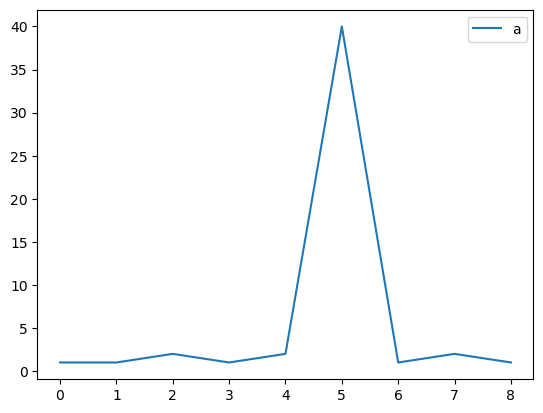

In [82]:
df = pd.DataFrame({
    "a": [1, 1, 2, 1, 2, 40, 1, 2, 1],
})
df.plot()

发现这组数据中的 40 很不符合逻辑，用 clip() 设置一下数据的范围，超出范围的就被剪裁到范围边界。

<Axes: >

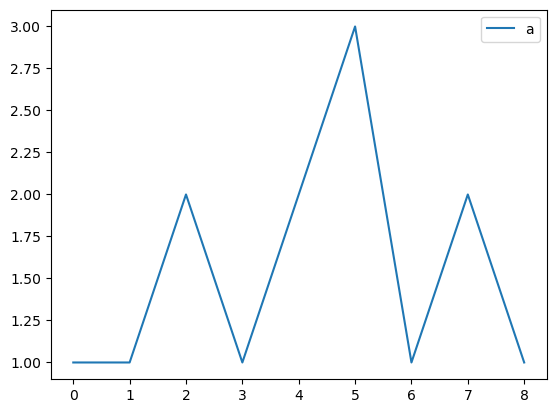

In [83]:
df["a"] = df["a"].clip(lower=0, upper=3)
df.plot()

## 时间数据

参考 [文档](https://pandas.pydata.org/docs/user_guide/timeseries.html)

### 读时间序列数据

In [84]:
df = pd.DataFrame({
    "time": ["2022/03/12", "2022/03/13", "2022/03/14"],
    "value": [1,2,3]
})
print(df)
print("\n\ntime:\n",df["time"])

         time  value
0  2022/03/12      1
1  2022/03/13      2
2  2022/03/14      3


time:
 0    2022/03/12
1    2022/03/13
2    2022/03/14
Name: time, dtype: object


In [85]:
pd.to_datetime(df["time"])

0   2022-03-12
1   2022-03-13
2   2022-03-14
Name: time, dtype: datetime64[ns]

In [86]:
s = pd.Series(
    ["2022/03/12", "2022.03.13", "14/03/2022"]
)

type(s)

pandas.core.series.Series

In [87]:
# format

# %m 月
# %d 日
# %Y 年的全称
# %% 比配一个 %
# %S 秒
# %H 时
# %M 分

pd.to_datetime(
    [
        "1@21@2022%%11|11|32", 
        "12@01@2022%%44|02|2", 
        "4@01@2022%%14|22|2"
    ],
    format="%m@%d@%Y%%%%%S|%H|%M"
)

DatetimeIndex(['2022-01-21 11:32:11', '2022-12-01 02:02:44',
               '2022-04-01 22:02:14'],
              dtype='datetime64[ns]', freq=None)

### 自建时间序列

In [88]:
import datetime

start = datetime.datetime(2022, 3, 12)
end = datetime.datetime(2022, 3, 18)

index = pd.date_range(start, end)
index

DatetimeIndex(['2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15',
               '2022-03-16', '2022-03-17', '2022-03-18'],
              dtype='datetime64[ns]', freq='D')

In [89]:
print(
    "range(1, 10, 2)\n", 
    list(range(1, 10, 2))
)
print(
    "\npd.date_range()\n",
    pd.date_range(start, end, freq="48h")
)

range(1, 10, 2)
 [1, 3, 5, 7, 9]

pd.date_range()
 DatetimeIndex(['2022-03-12', '2022-03-14', '2022-03-16', '2022-03-18'], dtype='datetime64[ns]', freq='48H')


In [90]:
print(
    "np.linspace(-1, 1, 5)\n",
    # np.linspace(-1, 1, 5)
    # default number is 50
    np.linspace(-1, 1)
)
print(
    "\npd.date_range(start, end, periods=5)\n",
    # pd.date_range(start, end, periods=5)
    pd.date_range(start, end)
)

np.linspace(-1, 1, 5)
 [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26530612  0.30612245  0.34693878  0.3877551   0.42857143
  0.46938776  0.51020408  0.55102041  0.59183673  0.63265306  0.67346939
  0.71428571  0.75510204  0.79591837  0.83673469  0.87755102  0.91836735
  0.95918367  1.        ]

pd.date_range(start, end, periods=5)
 DatetimeIndex(['2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15',
               '2022-03-16', '2022-03-17', '2022-03-18'],
              dtype='datetime64[ns]', freq='D')


### 选取时间

<Axes: >

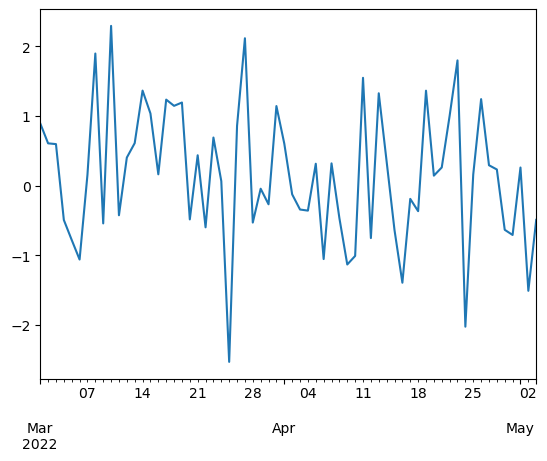

In [91]:
start = datetime.datetime(2022, 3, 1)
end = datetime.datetime(2022, 5, 3)

rng = pd.date_range(start, end)
ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts.plot()

In [92]:
ts

2022-03-01    0.895075
2022-03-02    0.607338
2022-03-03    0.596318
2022-03-04   -0.494639
2022-03-05   -0.781873
                ...   
2022-04-29   -0.635828
2022-04-30   -0.710251
2022-05-01    0.259733
2022-05-02   -1.513147
2022-05-03   -0.492898
Freq: D, Length: 64, dtype: float64

<Axes: >

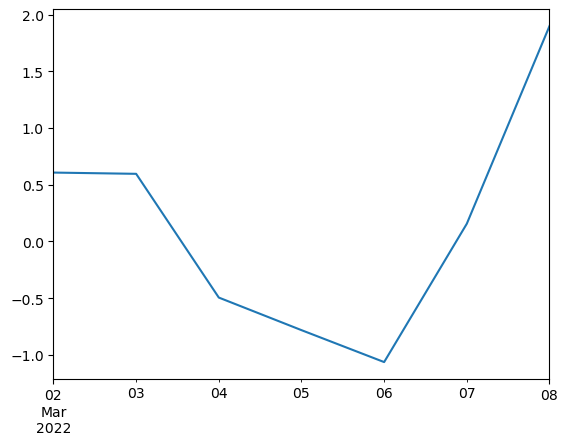

In [93]:
ts[1:8].plot()

### 时间运算

In [94]:
rng = pd.date_range("2022-01-01", "2022-01-07")
rng + pd.Timedelta(weeks=1)

DatetimeIndex(['2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13', '2022-01-14'],
              dtype='datetime64[ns]', freq='D')

In [95]:
rng + 2*pd.Timedelta(days=3) # +6 days

DatetimeIndex(['2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10',
               '2022-01-11', '2022-01-12', '2022-01-13'],
              dtype='datetime64[ns]', freq='D')

In [96]:
rng = pd.date_range("2022-02-08", "2022-02-11")

# rng.dayofweek; rng.weekofyear; rng.weekday
rng.dayofyear

# rng.weekofyear
# ==
type(pd.DatetimeIndex.isocalendar(rng).week)

rng.weekday
# type(rng.weekday)

rng.day_name()
rng.month_name()

Index(['February', 'February', 'February', 'February'], dtype='object')

In [97]:
rng.strftime("%m/%d/%Y") 


Index(['02/08/2022', '02/09/2022', '02/10/2022', '02/11/2022'], dtype='object')

### 时区

In [98]:
# 检查 datetime range 是否设置了时区
rng.tz is None

True

默认是不带时区的，如果需要，要特别标注好时区 tz_localize()。

In [99]:
s = pd.to_datetime(
    ["2022/03/12 22:11", "2022/03/12 12:11", "2022/03/12 2:11"]
)
s_us = s.tz_localize("America/New_York")
s_us

DatetimeIndex(['2022-03-12 22:11:00-05:00', '2022-03-12 12:11:00-05:00',
               '2022-03-12 02:11:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

或者初始化时用 tz 设置好时区：

In [100]:
rng = pd.date_range(
    "2022-01-08", "2022-01-11", 
    tz="America/New_York")
rng

DatetimeIndex(['2022-01-08 00:00:00-05:00', '2022-01-09 00:00:00-05:00',
               '2022-01-10 00:00:00-05:00', '2022-01-11 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq='D')

转回中国时区

In [101]:
s_cn = s_us.tz_convert("Asia/Shanghai")
s_cn

DatetimeIndex(['2022-03-13 11:11:00+08:00', '2022-03-13 01:11:00+08:00',
               '2022-03-12 15:11:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

获取国家的时区

In [102]:
import pytz

# # get all timezones
# pytz.all_timezones

pytz.country_timezones('CN')

['Asia/Shanghai', 'Asia/Urumqi']

In [103]:
pytz.country_timezones('US')

['America/New_York',
 'America/Detroit',
 'America/Kentucky/Louisville',
 'America/Kentucky/Monticello',
 'America/Indiana/Indianapolis',
 'America/Indiana/Vincennes',
 'America/Indiana/Winamac',
 'America/Indiana/Marengo',
 'America/Indiana/Petersburg',
 'America/Indiana/Vevay',
 'America/Chicago',
 'America/Indiana/Tell_City',
 'America/Indiana/Knox',
 'America/Menominee',
 'America/North_Dakota/Center',
 'America/North_Dakota/New_Salem',
 'America/North_Dakota/Beulah',
 'America/Denver',
 'America/Boise',
 'America/Phoenix',
 'America/Los_Angeles',
 'America/Anchorage',
 'America/Juneau',
 'America/Sitka',
 'America/Metlakatla',
 'America/Yakutat',
 'America/Nome',
 'America/Adak',
 'Pacific/Honolulu']

## 融合数据 Concat 和 Merge

参考 [文档](https://pandas.pydata.org/docs/user_guide/merging.html#merging)

In [104]:
df1 = pd.DataFrame({
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
    "C": ["C0", "C1", "C2", "C3"],
    "D": ["D0", "D1", "D2", "D3"],
}, index=[0, 1, 2, 3],)


df2 = pd.DataFrame({
    "A": ["A4", "A5", "A6", "A7"],
    "B": ["B4", "B5", "B6", "B7"],
    "C": ["C4", "C5", "C6", "C7"],
    "D": ["D4", "D5", "D6", "D7"],
}, index=[4, 5, 6, 7],)


df3 = pd.DataFrame({
    "A": ["A8", "A9", "A10", "A11"],
    "B": ["B8", "B9", "B10", "B11"],
    "C": ["C8", "C9", "C10", "C11"],
    "D": ["D8", "D9", "D10", "D11"],
}, index=[8, 9, 10, 11],)

In [105]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


如果想给合并后的数据带上索引栏，可以加上个主 key ：

In [106]:
all_classes = pd.concat(
    [df1, df2, df3], 
    keys=["x", "y", "z"])
all_classes

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [107]:
# 查看某个 key

all_classes.loc["x"]

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


pd.concat 的默认是上下拼接的，也可以指定进行左右拼接。

In [108]:
df4 = pd.DataFrame({
    "B": ["B2", "B3", "B6", "B7"],
    "D": ["D2", "D3", "D6", "D7"],
    "F": ["F2", "F3", "F6", "F7"],
}, index=[2, 3, 6, 7],)
print(df1)
print(df4)
pd.concat([df1, df4], axis=1)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


上面这种模式叫做 `join="outer"` ，是拼接（concat）的默认方式。可以试试 `join="inner"`

In [109]:
print(df1)
print(df4)
pd.concat([df1, df4], axis=1, join="inner")

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


有时需要一个全新索引，用 ignore_index 就可以：

In [110]:
pd.concat(
    [df1, df4], 
    ignore_index=True, 
    sort=False)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [111]:
new_col = pd.Series(["X0", "X1", "X2", "X3"], name="X")

print(df1)
print(new_col)

pd.concat([df1, new_col], axis=1)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
0    X0
1    X1
2    X2
3    X3
Name: X, dtype: object


,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


In [112]:
new_row = pd.Series(
    ["X0", "X1", "X2", "X3"],
    index=["A", "B", "C", "D"])

# new_row.to_frame().T
pd.concat(
    [df1, new_row.to_frame().T], 
    ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,X0,X1,X2,X3


### 融合Merge

concat 可以一次性合并多个 df，可以【左右】，也可以【上下】拼接， 但是 merge 是用来针对两张 df 做【左右】拼接的。 

In [113]:
left = pd.DataFrame({
    "key": ["K0", "K1", "K2", "K3"],
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
})

right = pd.DataFrame({
    "key": ["K0", "K1", "K2", "K3"],
    "C": ["C0", "C1", "C2", "C3"],
    "D": ["D0", "D1", "D2", "D3"],
})

pd.merge(left, right, on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


对比 concat()，merge() 在 join 的时候，有更多选择：
- outer: 集合两个 df 所有 的 key
- inner: 集合两个 df 同时拥有 的 key （默认）
- left: 仅考虑左边 df 所有 的 key
- right: 仅考虑右边 df 所有 的 key
- cross: 对于两个 df key 的笛卡尔积

In [114]:
left = pd.DataFrame({
    "key1": ["K0", "K0", "K1", "K2"],
    "key2": ["K0", "K1", "K0", "K1"],
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
})

right = pd.DataFrame({
    "key1": ["K0", "K1", "K1", "K2"],
    "key2": ["K0", "K0", "K0", "K0"],
    "C": ["C0", "C1", "C2", "C3"],
    "D": ["D0", "D1", "D2", "D3"],
})

pd.merge(left, right, on=["key1", "key2"])
# pd.merge(left, right, on=["key1", "key2"], how="inner")

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


pd.merge(left, right, on=["key1", "key2"], how="outer")

In [115]:
pd.merge(left, right, on=["key1", "key2"], how="left")

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [116]:
pd.merge(left, right, on=["key1", "key2"], how="right")

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [117]:
# cross 的组合表特别大，因为它是两个 key 的笛卡尔积

pd.merge(left, right, how="cross")

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


### 接入Join

join 是 df.join()，它其实更像是 merge 和 concat 的某种结合体，merge() 是基于给定的某个 on="key" 来拼接， 而 df.join() 使用的 key 可以和 concat() 一样，都是 index，也可以像 merge() 带一个 on="key" 去使用一个 column 作为索引。

In [118]:
left.set_index(["key1", "key2"]).join(right.set_index(["key1", "key2"]))

A   B    C    D
key1 key2                  
K0   K0    A0  B0   C0   D0
     K1    A1  B1  NaN  NaN
K1   K0    A2  B2   C1   D1
     K0    A2  B2   C2   D2
K2   K1    A3  B3  NaN  NaN

In [119]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [120]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [121]:
left = pd.DataFrame({
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
    "key": ["K0", "K1", "K0", "K1"],
})

right = pd.DataFrame({
    "C": ["C0", "C1"],
    "D": ["D0", "D1"]
}, index=["K0", "K1"])

left.join(right, on="key")

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


In [122]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K0
3,A3,B3,K1


In [123]:
right

,C,D
K0,C0,D0
K1,C1,D1


## 数据分组 Groupby

In [124]:
df = pd.DataFrame(
    [
        ("小红", "哈利波特", 80),
        ("小明", "蜘蛛侠", 72),
        ("小红", "雷神", 83),
        ("小红", "蜘蛛侠", 45),
        ("小明", "超人", 57),
    ],
    columns=("人", "人物", "评价"),
)
df

,人,人物,评价
0,小红,哈利波特,80
1,小明,蜘蛛侠,72
2,小红,雷神,83
3,小红,蜘蛛侠,45
4,小明,超人,57


In [125]:
# grouped 里存的是 row index
grouped = df.groupby("人")
grouped
grouped.groups

{'小明': [1, 4], '小红': [0, 2, 3]}

In [126]:
idx = grouped.groups['小红']
df.iloc[idx]

,人,人物,评价
0,小红,哈利波特,80
2,小红,雷神,83
3,小红,蜘蛛侠,45


In [127]:
grouped.get_group('小明')

,人,人物,评价
1,小明,蜘蛛侠,72
4,小明,超人,57


### 使用分组 

In [128]:
# 返回每一个组的第一个数据
grouped.first()

,人物,评价
人,,
小明,蜘蛛侠,72
小红,哈利波特,80


In [129]:
grouped.last()

,人物,评价
人,,
小明,超人,57
小红,蜘蛛侠,45


In [130]:
print("sum:\n", grouped.sum(numeric_only=True))
print("\nmean:\n", grouped.mean(numeric_only=True))

sum:
      评价
人      
小明  129
小红  208

mean:
            评价
人            
小明  64.500000
小红  69.333333


### 循环处理

In [131]:
for name, group in grouped:
    print("name:", name)
    print(group)

name: 小明
    人   人物  评价
1  小明  蜘蛛侠  72
4  小明   超人  57
name: 小红
    人    人物  评价
0  小红  哈利波特  80
2  小红    雷神  83
3  小红   蜘蛛侠  45


In [132]:
df = pd.DataFrame(
    [
        ("小红", "哈利波特", 80),
        ("小明", "蜘蛛侠", 72),
        ("小红", "雷神", 83),
        ("小红", "雷神", 90),
        ("小红", "蜘蛛侠", 45),
        ("小明", "超人", 57),
    ],
    columns=("人", "人物", "评价"),
)
df

,人,人物,评价
0,小红,哈利波特,80
1,小明,蜘蛛侠,72
2,小红,雷神,83
3,小红,雷神,90
4,小红,蜘蛛侠,45
5,小明,超人,57


### 组合分组

In [133]:
grouped = df.groupby(["人", "人物"])
print(grouped.groups)
grouped.get_group(('小红', '雷神'))

{('小明', '蜘蛛侠'): [1], ('小明', '超人'): [5], ('小红', '哈利波特'): [0], ('小红', '蜘蛛侠'): [4], ('小红', '雷神'): [2, 3]}


,人,人物,评价
2,小红,雷神,83
3,小红,雷神,90


### 聚合计算


In [134]:
grouped = df.groupby("人")
# grouped.aggregate(np.sum())
grouped.aggregate({'评价': 'sum'})

,评价
人,
小明,129
小红,298


想要对数据一次性做更多的计算，可以多加几个要计算的操作在后面：

In [135]:
grouped["评价"].agg([np.sum, np.mean, np.std])

,sum,mean,std
人,,,
小明,129,64.5,10.606602
小红,298,74.5,20.108042


In [136]:
# 改 column 名
grouped["评价"].agg(
    [np.sum, np.mean, np.std]
).rename(columns={
    "sum": "合", 
    "mean": "均值", 
    "std": "标准差"
})

,合,均值,标准差
人,,,
小明,129,64.5,10.606602
小红,298,74.5,20.108042


## 多索引数据

多索引在表格展示的时候，对数据规范化非常有利。因此，如果需要用表格来观察数据时，可以用这种形式来组织数据的。
如果要做机器学习或频繁的数据加工时，使用这种数据组成方式，会让加工难度变高，成本变高。

In [137]:
tuples = [
  # 年级，班级
  ("one", "1"), ("one", "1"),
  ("one", "2"), ("one", "2"),
  ("two", "1"), ("two", "1"),
  ("two", "2"), ("two", "2"),
]
index = pd.MultiIndex.from_tuples(tuples, names=["grade", "class"])
index


MultiIndex([('one', '1'),
            ('one', '1'),
            ('one', '2'),
            ('one', '2'),
            ('two', '1'),
            ('two', '1'),
            ('two', '2'),
            ('two', '2')],
           names=['grade', 'class'])

In [138]:
# 索引数据也维护在一张 DataFrame 中
df = pd.DataFrame([
    # 年级，班级
    ("one", "1"), ("one", "1"),
    ("one", "2"), ("one", "2"),
    ("two", "1"), ("two", "1"),
    ("two", "2"), ("two", "2"),
    ], columns=["grade", "class"]
)

index = pd.MultiIndex.from_frame(df)
index

MultiIndex([('one', '1'),
            ('one', '1'),
            ('one', '2'),
            ('one', '2'),
            ('two', '1'),
            ('two', '1'),
            ('two', '2'),
            ('two', '2')],
           names=['grade', 'class'])

In [139]:
# 构建 Series 的基础上，把 Multi-Index 给加上去了
s = pd.Series(
    ["小米", "小明",      # 一年一班
     "小命", "小勉",      # 一年二班
     "小牛", "小鸟",      # 二年一班
     "小南", "小妮"       # 二年二班
     ], 
    name="name",
    index=index)
s.index
s

grade  class
one    1        小米
       1        小明
       2        小命
       2        小勉
two    1        小牛
       1        小鸟
       2        小南
       2        小妮
Name: name, dtype: object

### 构建DataFrame多索引

In [140]:
df1 = pd.DataFrame(
    {"id": [11,12,13,14,15,16,17,18],
    "name": [
        "小米", "小明",
        "小命", "小勉",
        "小牛", "小鸟",
        "小南", "小妮"
    ]},
    index=index)
df1

id name
grade class         
one   1      11   小米
      1      12   小明
      2      13   小命
      2      14   小勉
two   1      15   小牛
      1      16   小鸟
      2      17   小南
      2      18   小妮

In [141]:
df2 = pd.DataFrame([
    [11,12,13,14,15,16,17,18],
    [
        "小米", "小明",
        "小命", "小勉",
        "小牛", "小鸟",
        "小南", "小妮"
    ]],
    index=["id", "name"],
    columns=index
    )

df2

grade one             two            
class   1   1   2   2   1   1   2   2
id     11  12  13  14  15  16  17  18
name   小米  小明  小命  小勉  小牛  小鸟  小南  小妮

In [142]:
df2["two"]

class,1,1,2,2
id,15,16,17,18
name,小牛,小鸟,小南,小妮


In [143]:
df2["two"]["2"]

class,2,2
id,17,18
name,小南,小妮


In [144]:
df1.loc["two"].loc["2"]

,id,name
class,,
2,17,小南
2,18,小妮


## 实践

### Covid-19 数据分析

In [145]:
df = pd.read_csv('./ds/covid19_day_wise.csv')
df

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [146]:
# 读取前 4 天数据
df[:4]

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11


In [147]:
df[df["Date"] == "2020-02-03"]

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
12,2020-02-03,19887,426,604,18857,3100,64,145,2.14,3.04,70.53,25


In [148]:
print(df[df["Date"] == "2020-02-03"].Confirmed)
print(df.loc[df["Date"] == "2020-02-03", "Confirmed"])

12    19887
Name: Confirmed, dtype: int64
12    19887
Name: Confirmed, dtype: int64


In [149]:
row = df[df["Date"] == "2020-02-03"]
row["New cases"]

12    3100
Name: New cases, dtype: int64

从 1 月 25 日到 7 月 22 日，一共增长了多少确诊病例？

In [150]:
date = pd.to_datetime(df["Date"])
date_range = (date >= "2020-01-25") & (date <= "2020-07-22")
new_cases = df.loc[date_range, "New cases"]
overall = new_cases.sum()
print("共新增：", overall)

共新增： 15247802


In [151]:
# 把 New recovered 为零的数都剔除掉
not_zero_mask = df["New recovered"] != 0

ratio = df.loc[not_zero_mask, "New cases"] / df.loc[not_zero_mask, "New recovered"]

# 平均比例, 标准差
ratio_mean = ratio.mean()
ratio_std = ratio.std()
print("平均比例：", ratio_mean, "；标准差：", ratio_std)

平均比例： 7.049556348053241 ；标准差： 19.145284932105497


<Axes: >

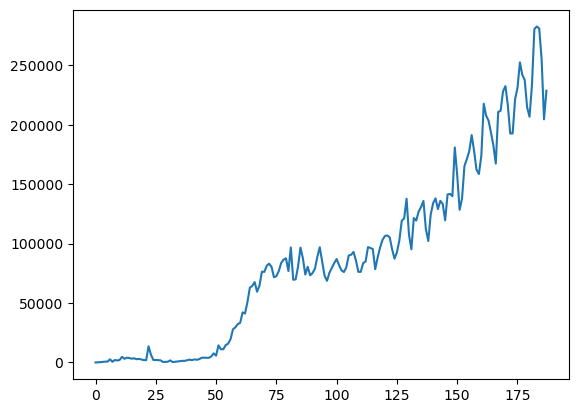

In [152]:
# 可视化：新增确诊
df["New cases"].plot()

In [153]:
# 观察图上，从 50 开始，曲线陡峭上升，打印 50 的数据
# df.loc[50, "Date"]
df.loc[50,:]

Date                      2020-03-12
Confirmed                     131603
Deaths                          4909
Recovered                      66434
Active                         60260
New cases                       5750
New deaths                       305
New recovered                   1321
Deaths / 100 Cases              3.73
Recovered / 100 Cases          50.48
Deaths / 100 Recovered          7.39
No. of countries                 113
Name: 50, dtype: object

<Axes: >

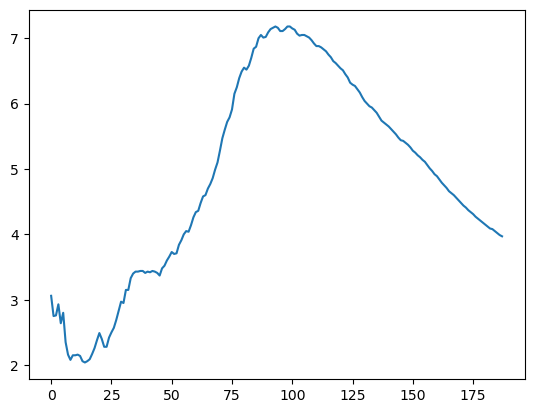

In [154]:
# 每百人死亡人数
df["Deaths / 100 Cases"].plot()

In [155]:
# 每百人死亡人数最多的那天
df.loc[df["Deaths / 100 Cases"].argmax(),:]

Date                      2020-04-24
Confirmed                    2806267
Deaths                        201401
Recovered                     771329
Active                       1833537
New cases                      96974
New deaths                      6674
New recovered                  49640
Deaths / 100 Cases              7.18
Recovered / 100 Cases          27.49
Deaths / 100 Recovered         26.11
No. of countries                 184
Name: 93, dtype: object

### 鸢尾花数据预处理

In [156]:
columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]
df = pd.read_csv('./ds/iris.csv', names=columns)
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### NaN数据处理

In [157]:
df.isna()

,sepal length,sepal width,petal length,petal width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [158]:
# 随机查看哪一项数据为 NA

df.isna().any()

sepal length    False
sepal width     False
petal length    False
petal width      True
class           False
dtype: bool

In [159]:
print(df.loc[pd.isna(df["petal width"])])

    sepal length  sepal width  petal length  petal width        class
25           5.0          3.0           1.6          NaN  Iris-setosa


找到空值后的处理方案，可以分为两种：

- 丢弃掉这一行
- 给空值填上一个合理的数

In [160]:
# 丢弃有空值的整行数据

df1 = df.dropna(axis=0, how="any")
df1

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [161]:
df1.isna().any()

sepal length    False
sepal width     False
petal length    False
petal width     False
class           False
dtype: bool

#### 异常值处理

使用可视化来观察是否有异常数据

<Axes: >

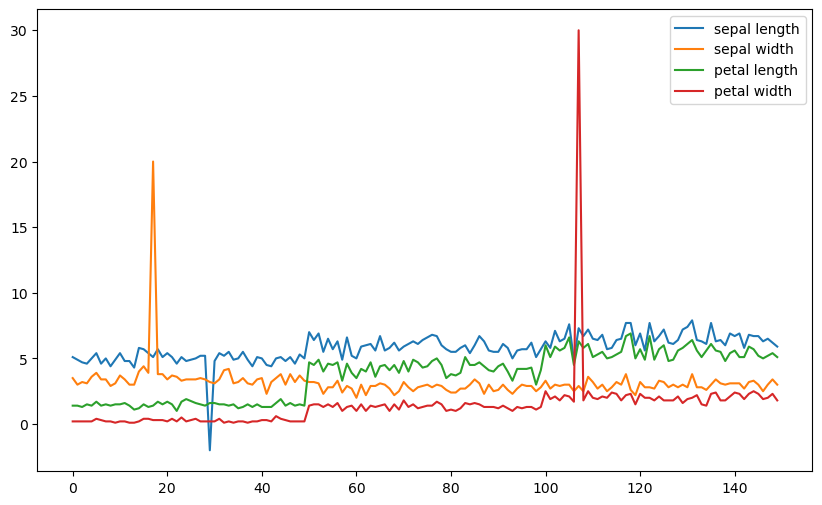

In [162]:
df1.plot(figsize=(10,6))

<Axes: >

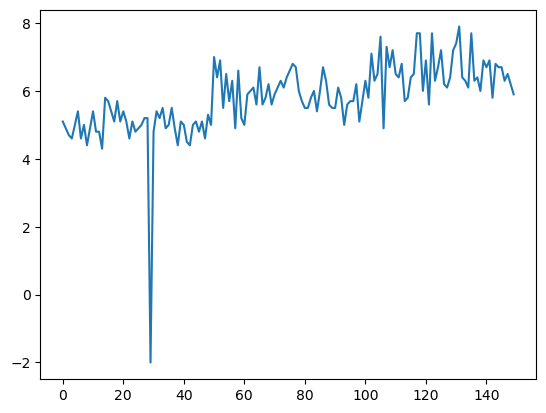

In [163]:
# 也可以绘制单项数据

df1["sepal length"].plot()

观察上图，发现有负值，有毛刺等，对这些数做处理。处理方案同空值处理。


<Axes: >

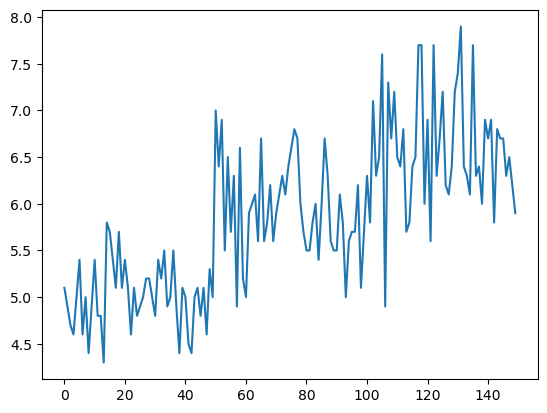

In [164]:
# drop ‘sepal length’ < 0
index = df1[df1["sepal length"]<0].index
df2 = df1.drop(index)

df2["sepal length"].plot()

<Axes: >

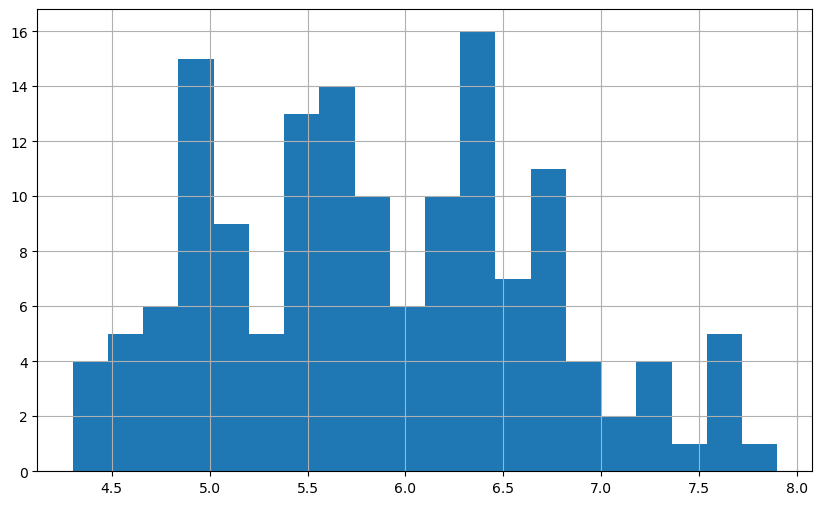

In [165]:
df2["sepal length"].hist(figsize=(10,6),bins=20)

In [166]:

col_name = "sepal width"
mask = df2[col_name] > 15
index = df2[ mask ].index

mean = df2[~mask][col_name].mean()
df2.loc[index, col_name] = mean

<Axes: >

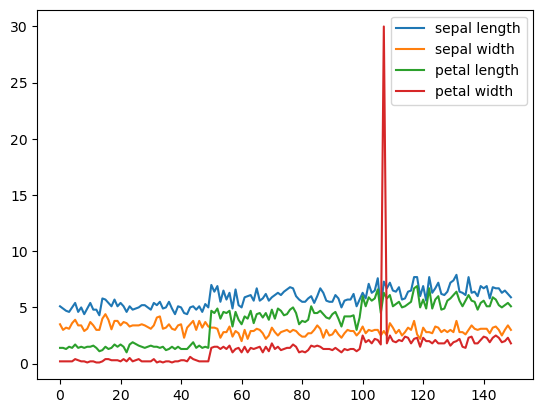

In [167]:
df2.plot()

In [168]:
col_name = "petal width"
mask = df2[col_name] > 15
index = df2[ mask ].index

mean = df2[~mask][col_name].mean()
df2.loc[index, col_name] = mean

<Axes: >

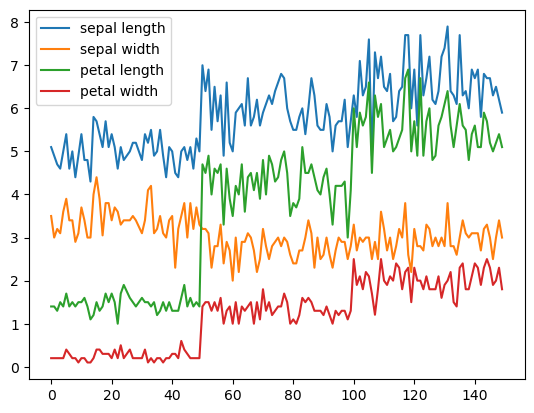

In [169]:
df2.plot()

#### 切分训练和测试数据集

In [170]:
total_data = len(df2)
n_train = int(total_data * 0.8)

train_data = df2.iloc[:n_train]
test_data = df2.iloc[n_train:]

test_data

,sepal length,sepal width,petal length,petal width,class
120,6.9,3.2,5.7,2.3,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
123,6.3,2.7,4.9,1.8,Iris-virginica
124,6.7,3.3,5.7,2.1,Iris-virginica
125,7.2,3.2,6.0,1.8,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
127,6.1,3.0,4.9,1.8,Iris-virginica
128,6.4,2.8,5.6,2.1,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica


观察发现，数据切分太规整了，分布不均匀。得先给他随机乱个序，然后在乱序后的 row 中切分个 20% 测试数据，80% 训练数据。这样会均匀分布些。
使用 Pandas 的 .sample() 功能就能对整个数据在 row 上乱序了。

In [171]:
df3 = df2.sample(frac=1)
df3

,sepal length,sepal width,petal length,petal width,class
21,5.1,3.70000,1.5,0.4,Iris-setosa
70,5.9,3.20000,4.8,1.8,Iris-versicolor
113,5.7,2.50000,5.0,2.0,Iris-virginica
65,6.7,3.10000,4.4,1.4,Iris-versicolor
110,6.5,3.20000,5.1,2.0,Iris-virginica
...,...,...,...,...,...
17,5.1,3.05034,1.4,0.3,Iris-setosa
32,5.2,4.10000,1.5,0.1,Iris-setosa
37,4.9,3.10000,1.5,0.1,Iris-setosa
48,5.3,3.70000,1.5,0.2,Iris-setosa


In [172]:
train_data = df3.iloc[:n_train]
test_data = df3.iloc[n_train:]

test_data

,sepal length,sepal width,petal length,petal width,class
55,5.7,2.80000,4.5,1.3,Iris-versicolor
76,6.8,2.80000,4.8,1.4,Iris-versicolor
146,6.3,2.50000,5.0,1.9,Iris-virginica
39,5.1,3.40000,1.5,0.2,Iris-setosa
73,6.1,2.80000,4.7,1.2,Iris-versicolor
131,7.9,3.80000,6.4,2.0,Iris-virginica
11,4.8,3.40000,1.6,0.2,Iris-setosa
149,5.9,3.00000,5.1,1.8,Iris-virginica
41,4.5,2.30000,1.3,0.3,Iris-setosa
81,5.5,2.40000,3.7,1.0,Iris-versicolor


#### 切分标签数据

切分标签也是机器学习中的一步，需要确定机器学习的特征是哪些，标签是哪些，然后按照规定的字段来选择。 比如说在 Iris 数据集中，比较明显 class 就是做分类的类别标签。

In [173]:
train_data.loc[:, "class"]

21         Iris-setosa
70     Iris-versicolor
113     Iris-virginica
65     Iris-versicolor
110     Iris-virginica
            ...       
14         Iris-setosa
136     Iris-virginica
145     Iris-virginica
103     Iris-virginica
10         Iris-setosa
Name: class, Length: 118, dtype: object

因为训练数据和测试数据都需要做标签的切分，可以写一个函数来做统一处理。

In [174]:
def get_xy(df):
    return df[columns], df[["class"]]

train_x, train_y = get_xy(train_data)
print(train_x.head())
print(train_y.head())

     sepal length  sepal width  petal length  petal width            class
21            5.1          3.7           1.5          0.4      Iris-setosa
70            5.9          3.2           4.8          1.8  Iris-versicolor
113           5.7          2.5           5.0          2.0   Iris-virginica
65            6.7          3.1           4.4          1.4  Iris-versicolor
110           6.5          3.2           5.1          2.0   Iris-virginica
               class
21       Iris-setosa
70   Iris-versicolor
113   Iris-virginica
65   Iris-versicolor
110   Iris-virginica


In [175]:
test_x, test_y = get_xy(test_data)
print(test_x.head())
print(test_y.head())

     sepal length  sepal width  petal length  petal width            class
55            5.7          2.8           4.5          1.3  Iris-versicolor
76            6.8          2.8           4.8          1.4  Iris-versicolor
146           6.3          2.5           5.0          1.9   Iris-virginica
39            5.1          3.4           1.5          0.2      Iris-setosa
73            6.1          2.8           4.7          1.2  Iris-versicolor
               class
55   Iris-versicolor
76   Iris-versicolor
146   Iris-virginica
39       Iris-setosa
73   Iris-versicolor


有的机器学习框架、模型可以直接使用 Pandas 数据类型，有的不一定可以，但是基本上都可以支持 Numpy array。 进一步将 Pandas 的 DataFrame 转成 Numpy array。

In [176]:
train_x_array, train_y_array = train_x.values, train_y.values
print(train_x_array[:3])

[[5.1 3.7 1.5 0.4 'Iris-setosa']
 [5.9 3.2 4.8 1.8 'Iris-versicolor']
 [5.7 2.5 5.0 2.0 'Iris-virginica']]


In [177]:
test_x_array, test_y_array = test_x.values, test_y.values
print(test_x_array[:3])

[[5.7 2.8 4.5 1.3 'Iris-versicolor']
 [6.8 2.8 4.8 1.4 'Iris-versicolor']
 [6.3 2.5 5.0 1.9 'Iris-virginica']]
